<a href="https://colab.research.google.com/github/solobala/ABD26/blob/main/MDS27_DZ8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание "Случайные величины и вероятности".

###Задание 1

В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [3]:
alfa = [0.2,0.3,0.5]
beta = [0.1, 0.05, 0.2]
p = 0
for i in range(3):
  p += alfa[i] * beta[i]
print(f'Вероятность того, что случайно купленная новая продукция окажется высшего сорта: {100*p}%')  

вероятность того, что случайно купленная новая продукция окажется высшего сорта: 13.5%


### Задание 2
Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

Пусть W - множество всех элементарных исходов при подбрасываний  уравновешенных монет 1,2,3.

Для каждой из монет возможны 2 элементарных исхода: 0 - "орел", 1 - "решка".Тогда множество всех элементарныx исходов - матрица вида:
[[0,0,0],[0,0,1],[0,1,0], [1,0,0],[1,0,1], [1,1,0],[0,1,1], [1,1,1]]. 

Все исходы равновероятны, в сумме вероятность = 1. Тогда p=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]

События A1,A2, A3 - подмножества W. 

*   A1 =[[0,0,0],[0,0,1], [1,1,0], [1,1,1]]. Тогда p(A1)=0,125*4=0.5
*   A2 = [[0,0,0], [1,0,0], [0,1,1], [1,1,1]]. Тогда p(A2)=0,125*4=0.5
*   A3 = [[0,0,0],[0,1,0], [1,0,1],  [1,1,1]]. Тогда p(A3)=0,125*4=0.5


Если рассматривать пары событий A1-A2, A1-A3 и A2-A3, то вероятность второго в каждой паре события P(B|A) - условная (условие - то, что 1-е в паре событие произошло) - и считается  как p(A∩B)/p(A) =(0.5/4*2)/0.5=0.5 

P(A) + P(B|A) = 0.5+0.5 =1 - для каждой пары A1-A2, A1-A3 и A2-A3

Если бы A1, A2, A3 были бы независимыми в генеральной совокупности W, то их суммарная вероятность была бы <=1. 

Однако это не так:   p(A1) + p(A2)+ p(A3) = 1.5, и элементарные исходы C[[0,0,0],  [1,1,1]] входят в каждое из A1, A2,A2

### Задание 3
Изучите 3 распределения из библиотеки scipy: Нормальное, Экспоненциальное, Стьюдента. Используя функцию плотности распредления (pdf), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения.

Дополнительная информация тут.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#### Нормальное распределение

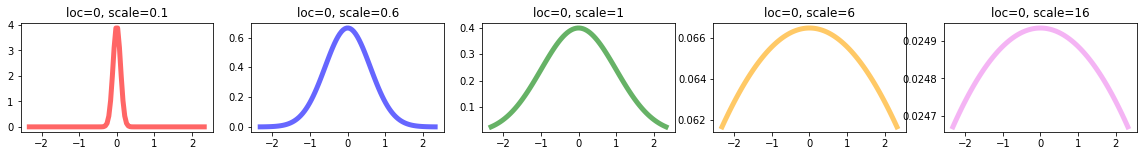

In [21]:
from scipy.stats import norm
# График зависит от двух параметров:loc(мат. ожидание, по умолчанию 0) 
# и scale (стандартное отклонение, по умолчанию 1)
fig = plt.figure(figsize=[20,2])
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
colors =['red', 'blue', 'green', 'orange', 'violet']
# Зафиксируем loc
locs = [0,0,0,0,0]
scales = [0.1, 0.6, 1, 6, 16]
for i in range(1,6):
  ax = fig.add_subplot(1, 5, i)
  ax.set_title(f'loc={locs[i-1]}, scale={scales[i-1]}')
  ax.plot(x, norm.pdf(x,loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label='norm pdf', color=colors[i-1])

##### Вывод: scale растягивает/сжимает график плотности распределения вдоль оси Х

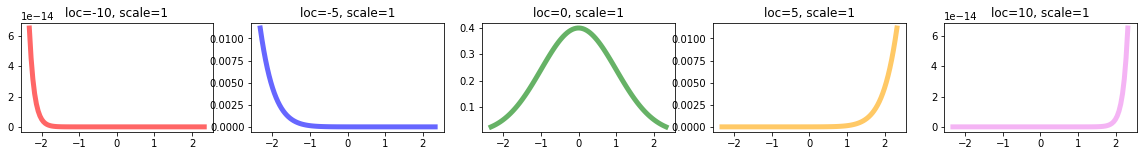

In [22]:
# теперь зафиксируем scale
fig = plt.figure(figsize=[20,2])
locs = [-10, -5, 0, 5, 10]
scales = [1,1,1,1,1]
for i in range(1,6):
  ax = fig.add_subplot(1, 5, i)
  ax.set_title(f'loc={locs[i-1]}, scale={scales[i-1]}')
  ax.plot(x, norm.pdf(x,loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label='norm pdf', color=colors[i-1])

##### Вывод: loc смещает график вправо(loc>0) или влево (loc <0)

#### Экспоненциальное распределение

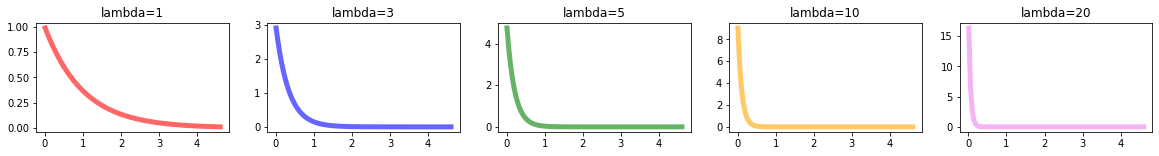

In [36]:
# исследуем зависимость от интенсивности lambda, которая связана с мат. ожиданием scale: scale=1/lambda
fig = plt.figure(figsize=[20,2])
x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
colors =['red', 'blue', 'green', 'orange', 'violet']
lambdas = [1,3,5, 10, 20]

for i in range(1,6):
  ax = fig.add_subplot(1, 5, i)
  ax.set_title(f'lambda={lambdas[i-1]}')
  scale=1/lambdas[i-1]
  ax.plot(x, expon.pdf(x, scale=scale), 'r-', lw=5, alpha=0.6, label='expon pdf', color=colors[i-1])

Вывод: c увеличением lambda увеличивается кривизна (уменьшается радиус кривизны)

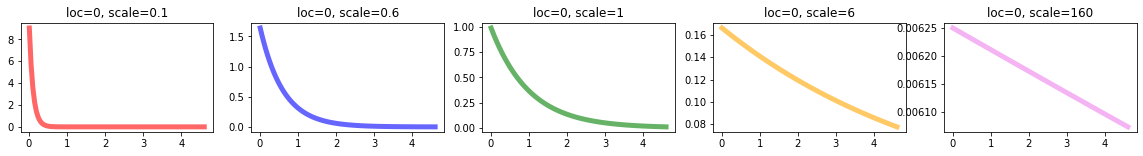

In [33]:
from scipy.stats import expon
# График зависит от двух параметров:loc и scale
fig = plt.figure(figsize=[20,2])
x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
colors =['red', 'blue', 'green', 'orange', 'violet']
# Зафиксируем loc
locs = [0,0,0,0,0]
scales = [0.1, 0.6, 1, 6, 160]
for i in range(1,6):
  ax = fig.add_subplot(1, 5, i)
  ax.set_title(f'loc={locs[i-1]}, scale={scales[i-1]}')
  ax.plot(x, expon.pdf(x,loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label='expon pdf', color=colors[i-1])

Вывод: С увеличением Scale уменьшается кривизна графика (увеличивается радиус кривизны), что совершенно логично, учитывая, что scale=1/lambda

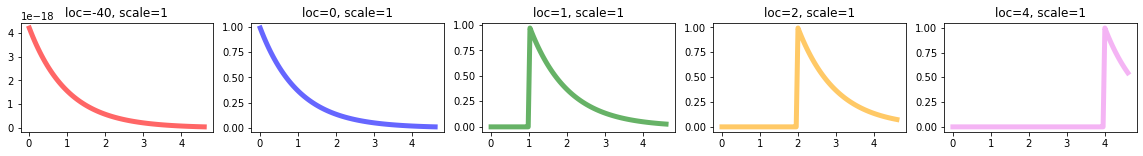

In [35]:
# теперь зафиксируем scale
fig = plt.figure(figsize=[20,2])
locs = [-40, 0, 1, 2, 4]
scales = [1,1,1,1,1]
for i in range(1,6):
  ax = fig.add_subplot(1, 5, i)
  ax.set_title(f'loc={locs[i-1]}, scale={scales[i-1]}')
  ax.plot(x, expon.pdf(x,loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label='expon pdf', color=colors[i-1])

:##### Вывод: loc смещает график вправо(loc>0) или влево (loc <0)

#### Распределение стьюдента

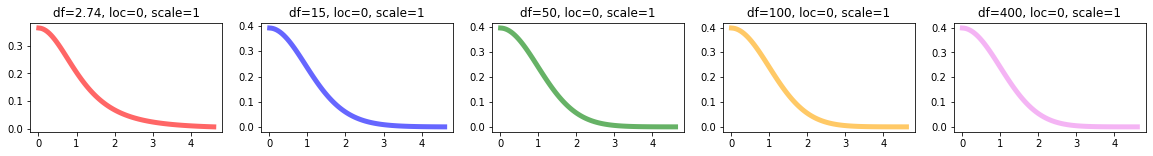

In [47]:
from scipy.stats import t
# График зависит от трех параметров: df (параметр степеней свободы), loc и scale
fig = plt.figure(figsize=[20,2])
x = np.linspace(expon.ppf(0.01),  expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
colors =['red', 'blue', 'green', 'orange', 'violet']
# Зафиксируем loc  и scale
locs = [0,0,0,0,0]
scales = [1,1,1,1,1]
df=[2.74,15, 50, 100, 400]
for i in range(1,6):
  ax = fig.add_subplot(1, 5, i)
  ax.set_title(f'df={df[i-1]}, loc={locs[i-1]}, scale={scales[i-1]}')
  ax.plot(x, t.pdf(x, df[i-1], loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label='Student pdf', color=colors[i-1])

##### Вывод: незначительно увеличивается кривизна графика (уменьшается радиус кривизны)

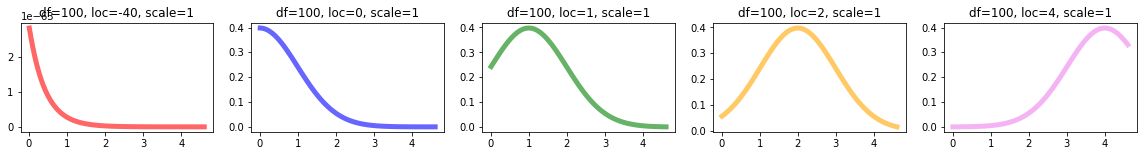

In [50]:
# теперь зафиксируем scale
fig = plt.figure(figsize=[20,2])
locs = [-40, 0, 1, 2, 4]
scales = [1,1,1,1,1]
df=[100, 100, 100, 100,100]
for i in range(1,6):
  ax = fig.add_subplot(1, 5, i)
  ax.set_title(f'df={df[i-1]}, loc={locs[i-1]}, scale={scales[i-1]}')
  ax.plot(x, t.pdf(x,  df[i-1],loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label='Student pdf', color=colors[i-1])

##### Вывод: loc смещает график вправо(loc>0) или влево (loc <0)

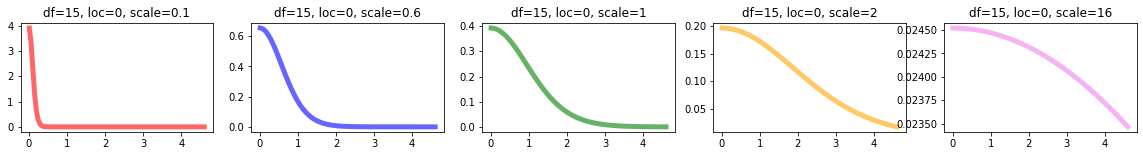

In [51]:
# Зафиксируем loc
fig = plt.figure(figsize=[20,2])
locs = [0,0,0,0,0]
scales = [0.1, 0.6, 1, 2, 16]
df=[15, 15, 15, 15, 15]
for i in range(1,6):
  ax = fig.add_subplot(1, 5, i)
  ax.set_title(f'df={df[i-1]}, loc={locs[i-1]}, scale={scales[i-1]}')
  ax.plot(x, t.pdf(x, df[i-1], loc=locs[i-1], scale=scales[i-1]), 'r-', lw=5, alpha=0.6, label='Student pdf', color=colors[i-1])

##### Вывод: scale значительно меняет кривизну графика ( при росте scale он из вогнутого становится выпуклым)